In [66]:
%load_ext autoreload

%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import torch

sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
baselines = np.array([0.95, 0.925, 0.9, 0.875, 0.8, 0.75, 0.7])
base_feature_sizes = np.array([9, 12, 15, 18, 24, 30, 45])

solved = [9, 12, 15]

In [ ]:
def load_nn_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        df = pd.read_csv(f'results/nn_results_{feature_size}.csv')

        results.append(df)

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

def load_rf_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        df = pd.read_csv(f'results/rf_results_{feature_size}.csv')

        results.append(df)

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

def load_log_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        df = pd.read_csv(f'results/log_results_{feature_size}.csv')

        results.append(df)

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

In [ ]:
nn_df = load_nn_results(solved)
rf_df = load_rf_results(solved)
log_df = load_log_results(solved)

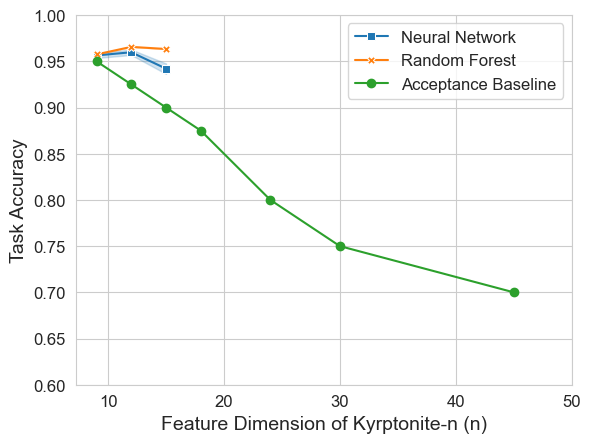

In [ ]:
sns.set_style("whitegrid")
nn_plt = sns.lineplot(nn_df, x='Feature size', y='test_accuracy', errorbar='sd', label='Neural Network', marker='s')

nn_plt.set_xlabel('Feature Dimension of Kyrptonite-n (n)', fontsize=14)
nn_plt.set_ylabel('Task Accuracy', fontsize=14)
# nn_plt.set_title('Test Accuracy', fontsize=16)
nn_plt.set(ylim=(0.6, 1.0))

sns.lineplot(rf_df, x='Feature size', y='test_accuracy', errorbar='sd', ax=nn_plt, label='Random Forest', marker='X')
sns.lineplot(log_df, x='Feature size', y='test_accuracy', errorbar='sd', ax=nn_plt, label='Logistic Regression', marker='D')

nn_plt.plot(base_feature_sizes, baselines, label='Acceptance Baseline', marker='o')

plt.xticks(fontsize=12, ticks=range(10, 50 + 1, 10))
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.show()